# Title

## 1. Introduction

TBA

## 2. Preliminary Results

### 2.1 R Preamble

In [34]:
# Run this first.
library(tidyverse)
library(tidymodels)

set.seed(5)
options(repr.plot.width = 6, repr.plot.height = 6)

SRC <-
    c("https://raw.githubusercontent.com/arthu-rguo/stat-201-proj/main/ubc.csv",
      "https://raw.githubusercontent.com/arthu-rguo/stat-201-proj/main/sfu.csv")

### 2.2 Loading and wrangling the dataset

Note that the raw UBC and SFU datasets span different date ranges. However, our analysis will focus mainly on the min. temperature, which might vary depending on the date. To prevent this from potentially skewing our results, we filter our wrangled dataset such that it spans the intersection of the UBC and SFU date ranges (from January 1 to June 30, 1995).

In [35]:
# Load and label the raw datasets for UBC and SFU, respectively.
ubc_raw <- read_csv(SRC[1], show_col_types = FALSE) |>
    mutate(location = as.factor("UBC"))

sfu_raw <- read_csv(SRC[2], show_col_types = FALSE) |>
    mutate(location = as.factor("SFU"))

# Join the datasets, select the relevant variables, and tidy the data.
ubc_sfu_raw <- bind_rows(ubc_raw, sfu_raw) |>
    rename(date_time = "Date/Time", min_temp_c = "Min Temp (°C)") |>
    select(location, date_time, min_temp_c) |>
    filter(!is.na(min_temp_c))

# Find the intersection of the date ranges and filter the dataset.
date_range <- ubc_sfu_raw |>
    group_by(location) |>
    summarize(min = min(date_time), max = max(date_time)) |>
    ungroup() |>
    summarize(min = max(min), max = min(max))

ubc_sfu_data <- ubc_sfu_raw |>
    filter(between(date_time, date_range$min, date_range$max))

# Preview the dataset.
head(ubc_sfu_data)
tail(ubc_sfu_data)

location,date_time,min_temp_c
<fct>,<date>,<dbl>
UBC,1995-01-01,-3.5
UBC,1995-01-02,-3.5
UBC,1995-01-03,-4.5
UBC,1995-01-04,-5.0
UBC,1995-01-05,-4.0
UBC,1995-01-06,-4.0


location,date_time,min_temp_c
<fct>,<date>,<dbl>
SFU,1995-06-25,12
SFU,1995-06-26,12
SFU,1995-06-27,16
SFU,1995-06-28,19
SFU,1995-06-29,20
SFU,1995-06-30,21


### 2.3 Summary statistics

In [51]:
ubc_sfu_summary <- ubc_sfu_data |>
    group_by(location) |>
    summarize(mean = mean(min_temp_c),
              sd = sd(min_temp_c),
              n = n())

ubc_sfu_summary

location,mean,sd,n
<fct>,<dbl>,<dbl>,<int>
UBC,6.279006,4.821630,181
SFU,5.729282,4.806671,181


### 2.4 Preliminary visualization

We begin by plotting the raw data in order to better understand the dataset. Roughly speaking, it appears that the min. temperatures for both locations are correlated as they follow a similar trend.

On average, the min. temperature for UBC appears to be somewhat higher than that of SFU, which aligns with our computed summary statistics.

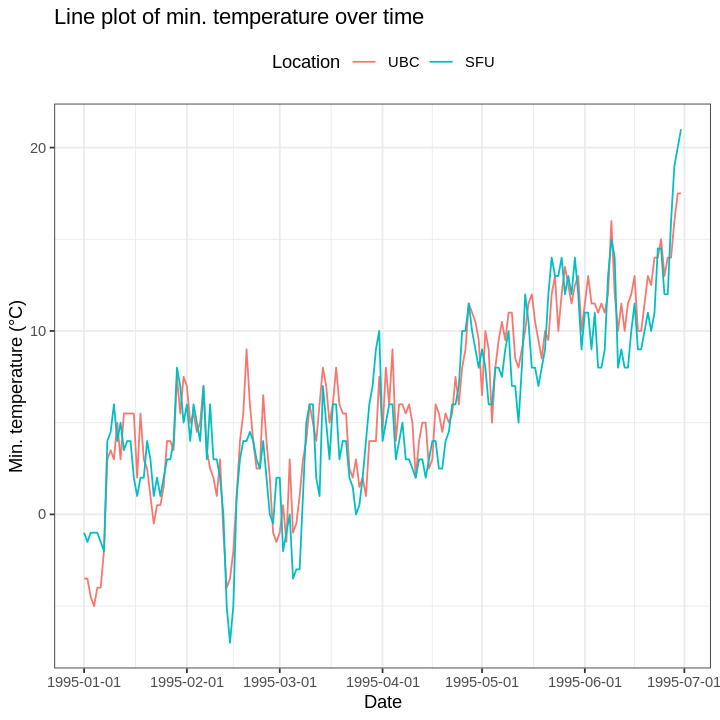

In [62]:
ubc_sfu_line_plot <- ubc_sfu_data |>
    ggplot(aes(x = date_time, y = min_temp_c, color = location)) +
        geom_line(alpha = 1) +
        labs(title = "Line plot of min. temperature over time",
             x = "Date", y = "Min. temperature (°C)", color = "Location") +
        scale_x_date(breaks = "1 month") +
        theme_bw() +
        theme(legend.position = "top")

ubc_sfu_line_plot

We can also plot and compare the sample distributions for both locations, which suggests that the min. temperature might not be normally distributed—in particular, the distribution for UBC seems somewhat bimodal. This will prevent us from relying on the central limit theorem in our analysis.

The spread of the min. temperature for both locations appears to be quite similar, which also aligns with our computed summary statistics.

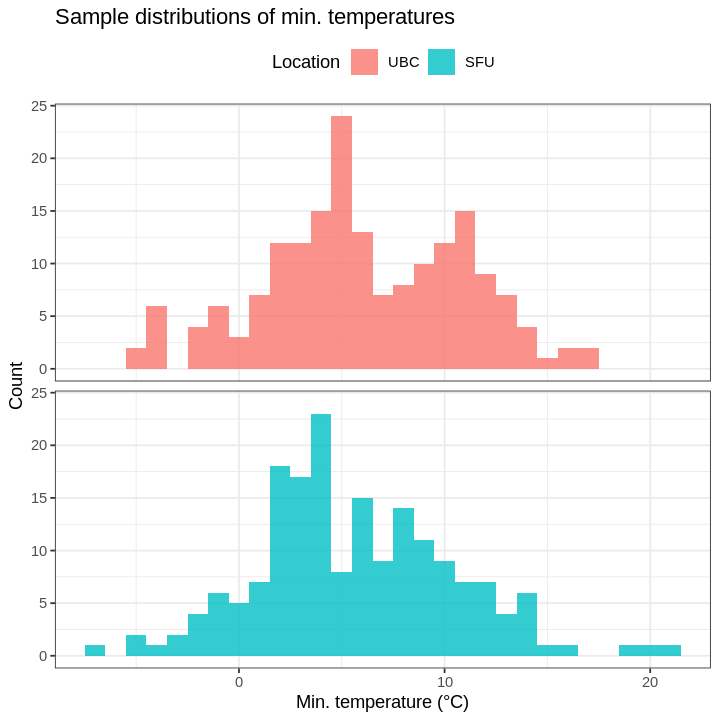

In [63]:
ubc_sfu_sample_dist <- ubc_sfu_data |>
    ggplot(aes(x = min_temp_c, fill = location)) +
        geom_histogram(binwidth = 1, alpha = 0.8) +
        labs(title = "Sample distributions of min. temperatures",
             x = "Min. temperature (°C)", y = "Count", fill = "Location") +
        facet_wrap(~location, ncol = 1) +
        theme_bw() +
        theme(legend.position = "top", 
              strip.background = element_blank(), strip.text = element_blank())

ubc_sfu_sample_dist